In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Lab 5.1 - RW with central attraction

Text(0.5, 1.0, 'prob to move towards origin')

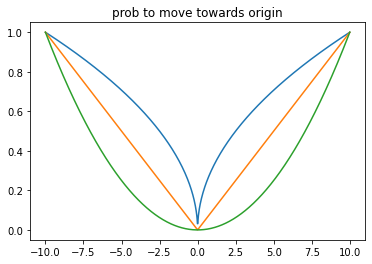

In [33]:
# let's plot the function

L = 10
xxx = np.linspace(-L,L,1000)

for gamma in [.5, 1, 2]:
    prob_to_origin = (np.abs(xxx/L))**gamma
    plt.plot(xxx,prob_to_origin)
plt.title('prob to move towards origin')



Text(0.5, 1.0, 'prob to move left')

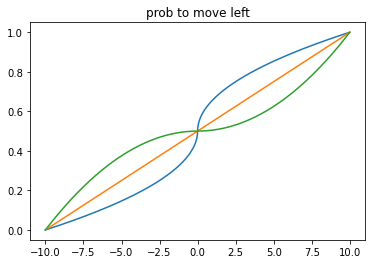

In [35]:
#now let's figure out how to make it a prob to move left (we want it to be zero at the left side and 1 at the right!)

plt.figure()
for gamma in [.5, 1, 2]:
    prob_to_move_left = 0.5*np.sign(xxx)*(np.abs(xxx/L))**gamma + 0.5
    plt.plot(xxx,prob_to_move_left)
plt.title('prob to move left')

<BarContainer object of 33 artists>

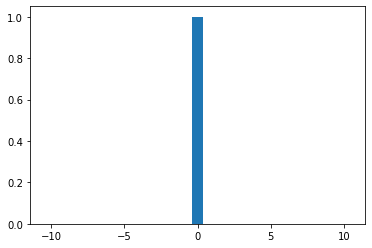

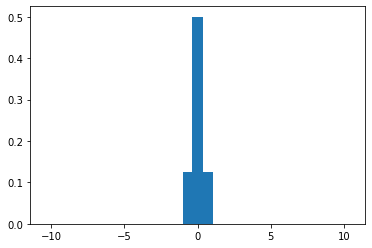

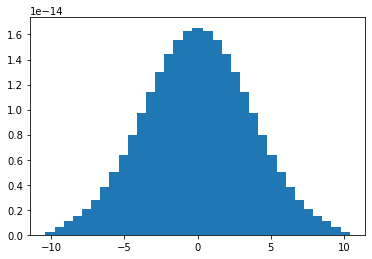

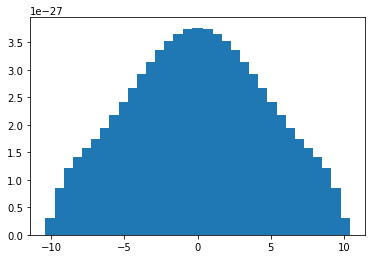

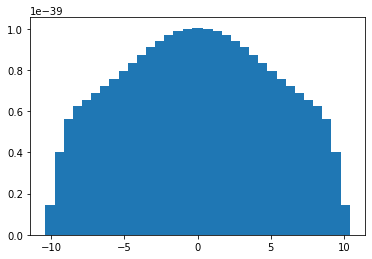

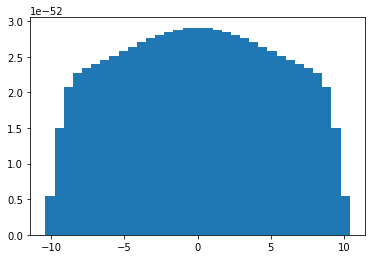

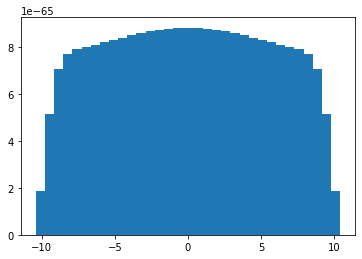

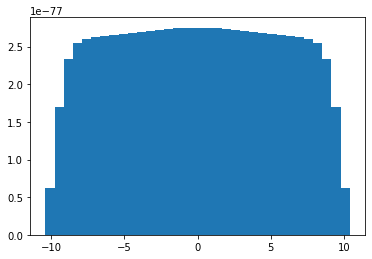

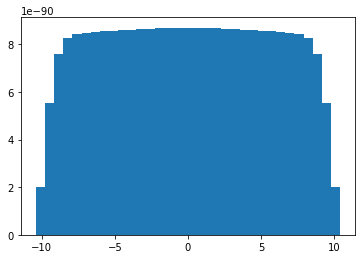

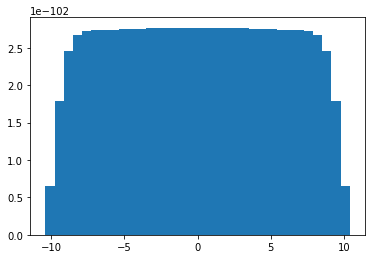

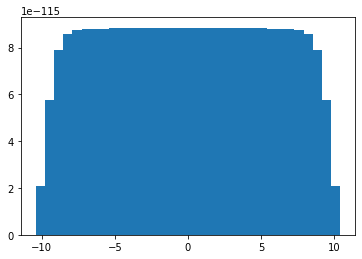

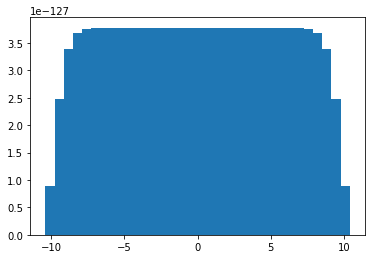

In [32]:
# code the simulation 

########################
### parameters
########################
num_time_steps = 1000
num_sites = 32+1

alpha = .5 # probability that each walker moves at all

L = 10 #the radius of the domain

gamma = 20 #parameter that gives us our steepness of the 'walls'

########################
### set up
########################

x_loc = np.linspace(-L,L,num_sites) #list of the x values of each site (needed for our prob to go left)
#print(x_loc)
prob_left = 0.5*np.sign(x_loc)*(np.abs(x_loc/L))**gamma + 0.5
#print(prob_left)

N = np.zeros(num_sites) #make our list of site densities
N[int(np.floor(num_sites/2))] = 1 #put all of our walker density in a middle site


plt.figure()
plt.bar(x_loc,N)

########################
### run
########################
for t in range(num_time_steps):
    stay = (1-alpha)*N
    left = alpha*N/2*prob_left
    right = alpha*N/2*(1-prob_left)
    
    N = stay + np.roll(left,-1) + np.roll(right,1)
    
    if(t%100==0):
        plt.figure()
        plt.bar(x_loc,N)
    
plt.figure()
plt.bar(x_loc,N)

In [36]:
#Let's turn it into a function


def confined_RW(L,max_time,alpha,gamma):
    ########################
    ### set up
    ########################

    x_loc = np.linspace(-L,L,num_sites) #list of the x values of each site (needed for our prob to go left)
    #print(x_loc)
    prob_left = 0.5*np.sign(x_loc)*(np.abs(x_loc/L))**gamma + 0.5
    #print(prob_left)

    N = np.zeros(num_sites) #make our list of site densities
    N[int(np.floor(num_sites/2))] = 1 #put all of our walker density in a middle site


    ########################
    ### run
    ########################
    for t in range(num_time_steps):
        stay = (1-alpha)*N
        left = alpha*N/2*prob_left
        right = alpha*N/2*(1-prob_left)

        N = stay + np.roll(left,-1) + np.roll(right,1)


    return N

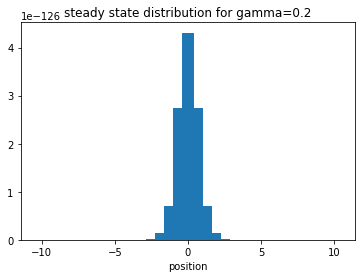

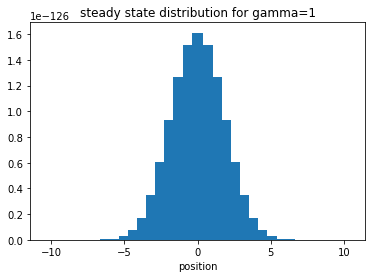

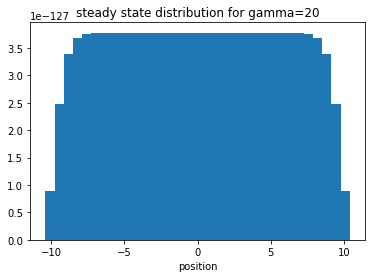

In [39]:
# let's test our function

########################
### parameters
########################
num_time_steps = 1000
num_sites = 32+1
alpha = .5 # probability that each walker moves at all
L = 10 #the radius of the domain




for gamma in [.2, 1, 20]:
    N = confined_RW(L,num_time_steps,alpha,gamma)
    plt.figure()
    plt.bar(x_loc,N)
    plt.title('steady state distribution for gamma=' + str(gamma))
    plt.xlabel('position')

Text(0, 0.5, 'Standard deviation in location')

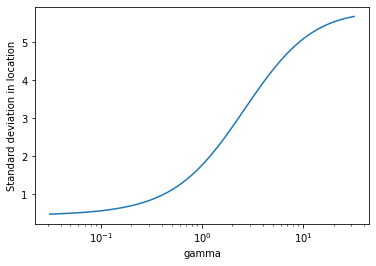

In [56]:
#now let's use it to do the experiment

########################
### parameters
########################
num_time_steps = 1000
num_sites = 32+1
alpha = .5 # probability that each walker moves at all
L = 10 #the radius of the domain

gamma_list = 2**np.linspace(-5,5)
#print(gamma_list)

std = np.zeros(len(gamma_list))

for i, gamma in enumerate(gamma_list):
    #run simulation
    N = confined_RW(L,num_time_steps,alpha,gamma)
    N = N/np.sum(N) #normalize PDF (should be done, but maybe an acounting bug or rounding error...)
    
    #find standard deviation
    std[i] = np.sqrt(np.sum((N*x_loc**2)))
    
    
plt.semilogx(gamma_list,std) 
plt.xlabel('gamma')
plt.ylabel('Standard deviation in location')

